In [ ]:
# %pip install pandas -U
# %pip install --upgrade pandas
# %pip install xlrd -U
import pandas as pd
# %pip install --upgrade xlrd
# %pip install statsmodels -U
# %pip install statsmodels==0.13.0

### Load Data

In [ ]:
years = ['2018','2019','2020','2021']
demands = [pd.read_excel(open('demands.xls', 'rb'), sheet_name=year) for year in years]

### Pre Processing

In [ ]:
for i in range(len(years)):
     demands[i]["YEAR"]=int(years[i])
total_demands = pd.concat(demands)

In [ ]:
total_demands

,SKU_ID,'01','02','03','04','05','06','07','08','09','10','11','12',TOTAL_FOR_YEAR,AVG_PER_MONTH,TRIGGER_QTY,MAXIMUM_QTY,QTY_ON_HAND,YEAR
0,NU802536,2839.0,1513.0,1639.0,1466.0,1484.0,1345.0,1812.0,1271.0,1625.0,1652.0,1297.0,1285.0,19228,1602.3,150.0,432,408,2018
1,14571184,12141.0,11562.0,10361.0,13413.0,9324.0,12707.0,8893.0,8776.0,7812.0,15865.0,17097.0,17987.0,145938,12161.5,1152.0,2304,1104,2018
2,RB038125,400.0,206.0,493.0,131.0,308.0,242.0,126.0,NaN,92.0,205.0,180.0,168.0,2551,212.6,24.0,48,0,2018
3,DS088381,954.0,636.0,678.0,330.0,528.0,360.0,546.0,492.0,534.0,948.0,3504.0,1026.0,10536,878.0,144.0,240,126,2018
4,DS088459,49.0,22.0,83.0,26.0,29.0,27.0,40.0,20.0,29.0,40.0,29.0,99.0,493,41.1,60.0,120,127,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3007,GS703250,NaN,NaN,NaN,NaN,NaN,NaN,12.0,99.0,21.0,39.0,24.0,23.0,218,18.2,56.0,112,60,2021
3008,WT420409,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,3,0.3,20.0,40,47,2021
3009,SQ336060,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,44.0,44,3.7,28.0,56,30,2021
3010,0SK00441,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17.0,17,1.4,240.0,480,259,2021


In [ ]:
##################### DO NOT DELETE #####################
# active_sku_ids = total_demands[total_demands['YEAR'] == 2021]['SKU_ID'].unique()
# total_demands = total_demands[total_demands['SKU_ID'].isin(active_sku_ids)]

In [ ]:
assuta_items = pd.read_excel("Assuta_items.xlsx")
assuta_items

,SKU_ID,Is_Assuta
0,AS100016,Y
1,AS120257,Y
2,AS110041,Y
3,AS180293,Y
4,AS040107,Y
...,...,...
1285,AS400185,Y
1286,AS010122,Y
1287,AS000201,Y
1288,ASA00006,Y


In [ ]:
total_demands = total_demands[~total_demands["SKU_ID"].isin(assuta_items["SKU_ID"])].copy()

In [ ]:
total_demands.fillna(0.1,inplace=True)

In [ ]:
total_demands

,SKU_ID,'01','02','03','04','05','06','07','08','09','10','11','12',TOTAL_FOR_YEAR,AVG_PER_MONTH,TRIGGER_QTY,MAXIMUM_QTY,QTY_ON_HAND,YEAR
0,NU802536,2839.0,1513.0,1639.0,1466.0,1484.0,1345.0,1812.0,1271.0,1625.0,1652.0,1297.0,1285.0,19228,1602.3,150.0,432,408,2018
1,14571184,12141.0,11562.0,10361.0,13413.0,9324.0,12707.0,8893.0,8776.0,7812.0,15865.0,17097.0,17987.0,145938,12161.5,1152.0,2304,1104,2018
2,RB038125,400.0,206.0,493.0,131.0,308.0,242.0,126.0,0.1,92.0,205.0,180.0,168.0,2551,212.6,24.0,48,0,2018
3,DS088381,954.0,636.0,678.0,330.0,528.0,360.0,546.0,492.0,534.0,948.0,3504.0,1026.0,10536,878.0,144.0,240,126,2018
4,DS088459,49.0,22.0,83.0,26.0,29.0,27.0,40.0,20.0,29.0,40.0,29.0,99.0,493,41.1,60.0,120,127,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3007,GS703250,0.1,0.1,0.1,0.1,0.1,0.1,12.0,99.0,21.0,39.0,24.0,23.0,218,18.2,56.0,112,60,2021
3008,WT420409,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,3.0,0.1,3,0.3,20.0,40,47,2021
3009,SQ336060,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,44.0,44,3.7,28.0,56,30,2021
3010,0SK00441,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,17.0,17,1.4,240.0,480,259,2021


In [ ]:
# # Add quarters columns
# total_demands["P1"] = total_demands["'01'"] + total_demands["'02'"]
# total_demands["P2"] = total_demands["'03'"] + total_demands["'04'"]
# total_demands["P3"] = total_demands["'05'"] + total_demands["'06'"]
# total_demands["P4"] = total_demands["'07'"] + total_demands["'08'"]
# total_demands["P5"] = total_demands["'09'"] + total_demands["'10'"]
# total_demands["P6"] = total_demands["'11'"] + total_demands["'12'"]

# Add quarters columns
total_demands["Q1"] = total_demands["'01'"] + total_demands["'02'"] + total_demands["'03'"]
total_demands["Q2"] = total_demands["'04'"] + total_demands["'05'"] + total_demands["'06'"]
total_demands["Q3"] = total_demands["'07'"] + total_demands["'08'"] + total_demands["'09'"]
total_demands["Q4"] = total_demands["'10'"] + total_demands["'11'"] + total_demands["'12'"]

In [ ]:
total_demands

,SKU_ID,'01','02','03','04','05','06','07','08','09',...,TOTAL_FOR_YEAR,AVG_PER_MONTH,TRIGGER_QTY,MAXIMUM_QTY,QTY_ON_HAND,YEAR,Q1,Q2,Q3,Q4
0,NU802536,2839.0,1513.0,1639.0,1466.0,1484.0,1345.0,1812.0,1271.0,1625.0,...,19228,1602.3,150.0,432,408,2018,5991.0,4295.0,4708.0,4234.0
1,14571184,12141.0,11562.0,10361.0,13413.0,9324.0,12707.0,8893.0,8776.0,7812.0,...,145938,12161.5,1152.0,2304,1104,2018,34064.0,35444.0,25481.0,50949.0
2,RB038125,400.0,206.0,493.0,131.0,308.0,242.0,126.0,0.1,92.0,...,2551,212.6,24.0,48,0,2018,1099.0,681.0,218.1,553.0
3,DS088381,954.0,636.0,678.0,330.0,528.0,360.0,546.0,492.0,534.0,...,10536,878.0,144.0,240,126,2018,2268.0,1218.0,1572.0,5478.0
4,DS088459,49.0,22.0,83.0,26.0,29.0,27.0,40.0,20.0,29.0,...,493,41.1,60.0,120,127,2018,154.0,82.0,89.0,168.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3007,GS703250,0.1,0.1,0.1,0.1,0.1,0.1,12.0,99.0,21.0,...,218,18.2,56.0,112,60,2021,0.3,0.3,132.0,86.0
3008,WT420409,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,...,3,0.3,20.0,40,47,2021,0.3,0.3,0.3,3.2
3009,SQ336060,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,...,44,3.7,28.0,56,30,2021,0.3,0.3,0.3,44.2
3010,0SK00441,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,...,17,1.4,240.0,480,259,2021,0.3,0.3,0.3,17.2


### Winters Model

In [ ]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt
import warnings
from tqdm import tqdm
warnings.filterwarnings("ignore")
import pandas.util.testing as tm

%matplotlib inline

In [ ]:
def seasonality (demand_series,seasonal_periods):
    fit1 = ExponentialSmoothing(demand_series,seasonal_periods=seasonal_periods,trend="add",
                                seasonal="mul",use_boxcox=True,initialization_method="estimated").fit()
    # fit = ExponentialSmoothing(demand_series,seasonal_periods=4,trend="add",seasonal="mul",damped_trend=True,use_boxcox=True,initialization_method="estimated").fit(smoothing_level=0.5, smoothing_trend=0.5, smoothing_seasonal=0.5)
    results = pd.DataFrame(index=[r"$\alpha$", r"$\beta$", r"$\phi$", r"$\gamma$", r"$l_0$", "$b_0$", "SSE"])   
    params = ["smoothing_level","smoothing_trend","damping_trend","smoothing_seasonal","initial_level","initial_trend"]
    results["Multiplica Dam"] = [fit1.params[p] for p in params] + [fit1.sse]
    fit2 = ExponentialSmoothing(demand_series,seasonal_periods=seasonal_periods,trend="add",
                                seasonal="mul",initialization_method="estimated").fit()
    # fit = ExponentialSmoothing(demand_series,seasonal_periods=4,trend="add",seasonal="mul",damped_trend=True,initialization_method="estimated").fit(smoothing_level=0.5, smoothing_trend=0.5, smoothing_seasonal=0.5)
    df = pd.DataFrame(np.c_[aust, fit2.level, fit2.trend, fit2.season, fit2.fittedvalues], columns=['Y_t', 'L_t', 'B_t', 'S_t', 'Y_t_hat'],index=aust.index)
    # df.append(fit.forecast(8).rename(r"$/hat{y}_t$").to_frame(), sort=True)
    # a = pd.concat(df,df, ignore_index=True)
    return pd.concat([df['S_t'].iloc[:seasonal_periods],df['B_t'].iloc[:1]]).to_numpy()

data = [10,40,11,100,20,30,20,30,15,120,40,50]
index = pd.date_range(start="2005", end="2017", freq="Y")
aust = pd.Series(data, index)
print(seasonality(aust,4))

[0.43915904 1.87695968 0.65324401 1.31923658 2.47847868]


In [ ]:
# unique_sku_ids = total_demands['SKU_ID'].unique()
# v_list = []
# for i,k in tqdm(enumerate(unique_sku_ids)):
#     data = total_demands[total_demands['SKU_ID'] == k].iloc[:,19:].to_numpy().reshape(-1)
#     try:
#         index = np.arange(len(data))
#         aust = pd.Series(data, index)
#         vector = seasonality(aust,4)
#     except ValueError:
#         new_data = np.concatenate([data, data])
#         index = np.arange(len(new_data))
#         aust = pd.Series(new_data, index)
#         vector = seasonality(aust,4)
#     v_list.append(vector)
# df1 = pd.DataFrame(unique_sku_ids,columns=['SKU_ID'])
# df2 = pd.DataFrame(v_list,columns=['C1','C2','C3','C4','trend'])
# df3 = pd.concat([df1,df2],axis=1)

2898it [06:25,  7.51it/s]


In [ ]:
# df3.to_csv('seasonality_4.csv',index=False)

In [ ]:
seasonality = pd.read_csv('seasonality_4.csv')
# seasonality['STDV'] = np.std(seasonality.iloc[:,1:7].to_numpy(),axis=1)
# seasonality.sort_values(by=['STDV'],inplace=True)
seasonality

,SKU_ID,C1,C2,C3,C4,trend
0,NU802536,1.168768,0.978172,1.054173,1.105895,-2.154502e+02
1,14571184,0.851989,1.025192,0.802074,1.320736,-2.256390e+02
2,RB038125,1.372133,1.767763,0.795531,1.092031,-4.804327e+01
3,DS088381,1.052651,0.637925,0.661759,1.955469,-9.765153e+01
4,DS088459,1.106212,0.993855,0.729221,1.422476,8.666120e-02
...,...,...,...,...,...,...
2893,GS703250,0.005489,0.005489,2.415371,1.573651,5.966294e-15
2894,WT420409,0.292683,0.292683,0.292683,3.121951,0.000000e+00
2895,SQ336060,0.026608,0.026608,0.026608,3.920177,0.000000e+00
2896,0SK00441,0.066298,0.066298,0.066298,3.801105,0.000000e+00


In [ ]:
# Load the data set
seasonality = pd.read_csv('seasonality_4.csv')
# Normalize the seasonaluty values (sum up to  1)
seasonality.iloc[:,1:5] = seasonality.iloc[:,1:5].apply(lambda row: row/np.sum(row,axis=0), axis=1)
# Add 'STDV' column (stdv of seasonality values)
seasonality['STDV'] = np.std(seasonality.iloc[:,1:5].to_numpy(),axis=1)
seasonality.sort_values(by=['STDV'],inplace=True)
# Normalize the trend values 
# from sklearn.preprocessing import StandardScaler
# for column in seasonality.columns:
#   if column == 'trend':
#     scale= StandardScaler()
#     seasonality[column] = scale.fit_transform(seasonality[column].to_numpy().reshape(-1, 1))
# Reset indexes
seasonality.reset_index(inplace=True)
# Display every 100th index
idxes_list = list(seasonality.index)[0::200]
seasonality_partly = seasonality[seasonality.index.isin(idxes_list)]
seasonality_partly

,index,SKU_ID,C1,C2,C3,C4,trend,STDV
0,747,I1357593,0.250643,0.250195,0.252880,0.246281,410.690025,0.002376
200,1532,ULM00011,0.259744,0.261363,0.262451,0.216442,-2304.797751,0.019399
400,228,DSNN6539,0.220017,0.295001,0.250450,0.234531,-2.954398,0.028123
600,353,TA000001,0.226052,0.234522,0.314070,0.225357,18.141128,0.037166
800,185,T3M1665R,0.257411,0.314185,0.245081,0.183323,-0.358949,0.046488
1000,628,C2242340,0.332665,0.187525,0.208382,0.271427,5.456232,0.056850
1200,574,AB190423,0.140970,0.250185,0.275251,0.333594,-73.304028,0.069845
1400,973,TP012049,0.198626,0.383772,0.261956,0.155646,47.362163,0.085994
1600,148,MZ017404,0.210260,0.150981,0.201838,0.436921,36.044221,0.110276
1800,2435,WT473685,0.262366,0.344086,0.387097,0.006452,0.000000,0.147577


[ 3773.  3742.  4103.  4270.  4999.  6339.  7186.  6902.  7637.  6977.
  7348.  7695.  8300.  9201.  9817. 10510.]


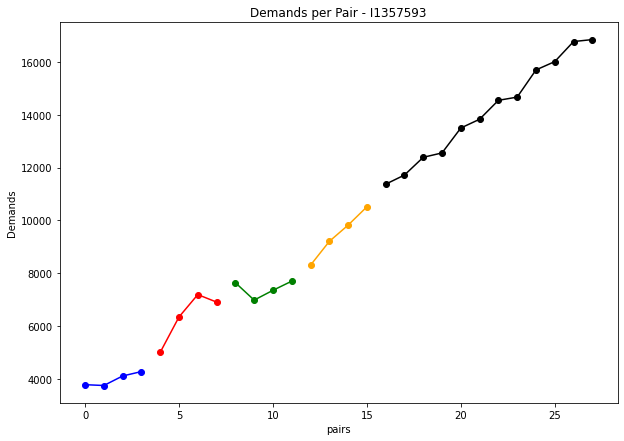

In [67]:
def plot_graph(sku_id):
  data = total_demands[total_demands['SKU_ID'] == sku_id].iloc[:,19:].to_numpy().reshape(-1)
  index = np.arange(len(data))
  aust = pd.Series(data, index)
  fit = ExponentialSmoothing(aust,seasonal_periods=4,trend="add",seasonal="mul",use_boxcox=True,initialization_method="estimated").fit()
  fcast1 = fit.forecast(12)
  print(data)
  d=0
  dic = {0:"blue", 1:"red", 2:"green", 3:"orange"}
  for i in range(int(len(aust)/4)):
    ax = aust[d:d+4].plot(figsize=(10, 7),marker="o",color=dic[i],title=f'Demands per Pair - {sku_id}')
    d += 4
  fcast1.plot(ax=ax, color="black", marker="o", legend=False)
  ax.set_ylabel("Demands")
  ax.set_xlabel("pairs")
  # path = f'{sku_id}.png'
  # plt.savefig(path)
plot_graph('I1357593')

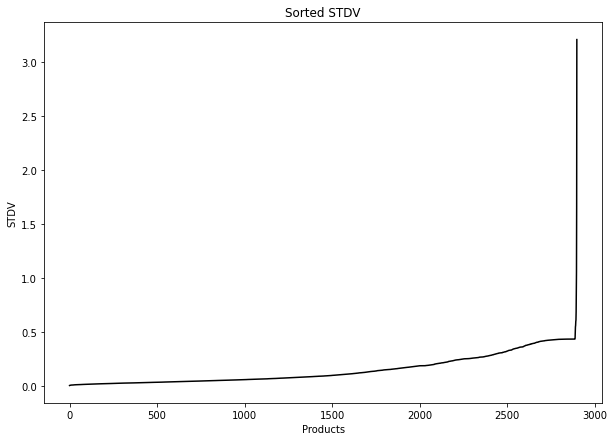

In [ ]:
def plot_STDV(seasonality):
  data = seasonality.iloc[:2898,:]['STDV'].to_numpy().reshape(-1)
  index = np.arange(len(data))
  aust = pd.Series(data, index)
  ax = aust.plot(figsize=(10, 7),color="black",title=f'Sorted STDV')
  ax.set_ylabel("STDV")
  ax.set_xlabel("Products")
  # path = f'{sku_id}.png'
  # plt.savefig(path)
plot_STDV(seasonality)

In [ ]:
# from sklearn.preprocessing import StandardScaler
# for column in seasonality.columns:
#   if column == 'trend':
#     scale= StandardScaler()
#     seasonality[column] = scale.fit_transform(seasonality[column].to_numpy().reshape(-1, 1))
# seasonality

In [ ]:
# def plot_graph(sku_id):
#   data = total_demands[total_demands['SKU_ID'] == sku_id].iloc[:,19:].to_numpy().reshape(-1)
#   index = np.arange(len(data))
#   aust = pd.Series(data, index)
#   # data = [10,40,110,100,202,303,1000,1100]
#   # index = pd.date_range(start="2005", end="2013", freq="Y")
#   # aust = pd.Series(data, index)
#   fit = ExponentialSmoothing(aust,seasonal_periods=6,trend="add",seasonal="mul",use_boxcox=True,initialization_method="estimated").fit()
#   fcast1 = fit.forecast(12)
#   print(data)
#   print(fcast1)
#   ax = aust.plot(figsize=(10, 7),marker="o",color="blue",title=f'Demands per Pair - {sku_id}')
#   fcast1.plot(ax=ax, color="black", marker="o", legend=False)
#   ax.set_ylabel("Demands")
#   ax.set_xlabel("Quarters")
#   path = f'{sku_id}.png'
#   plt.savefig(path)

# plot_graph('FC42561N')

In [ ]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

np.random.seed(42)
data = seasonality.iloc[:,1:-1].to_numpy()
# pca = PCA(n_components=2)
# components = pca.fit_transform(data)
tsne = TSNE(n_components=2, perplexity=50)
components = tsne.fit_transform(data)
# components = data

kmeans = KMeans(n_clusters=8).fit(components)
cluster_map = pd.DataFrame()
cluster_map['data_index'] = seasonality.index.values
cluster_map['cluster'] = kmeans.labels_# fig, ax = plt.subplots(figsize=(20, 10))
cluster_map['cluster'].value_counts()

0    524
3    442
5    392
2    371
6    339
7    304
4    271
1    255
Name: cluster, dtype: int64

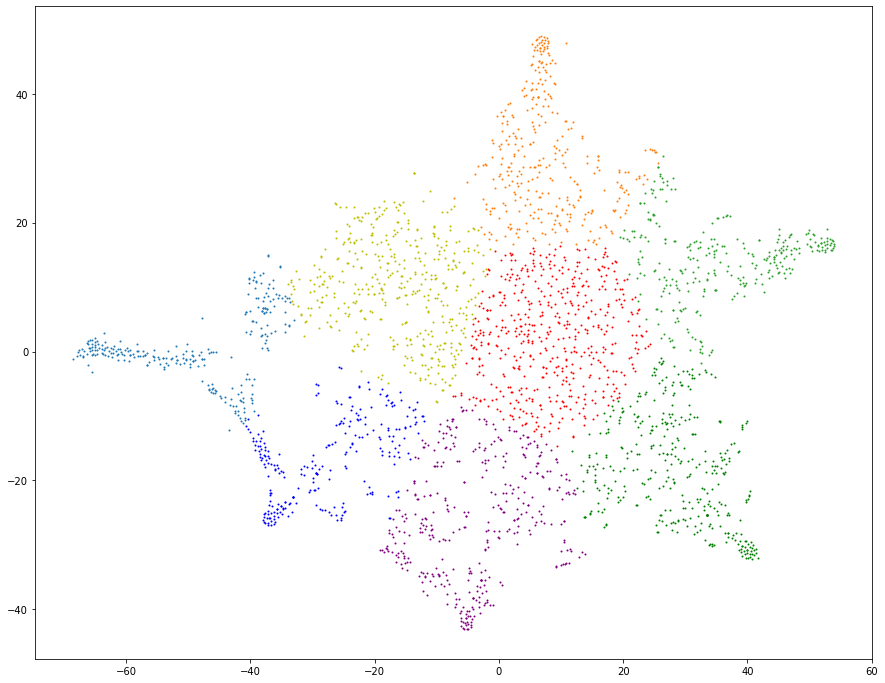

In [ ]:
fig, ax = plt.subplots(figsize=(15, 12))
plt.scatter(components[kmeans.labels_==0][:,0],
            components[kmeans.labels_==0][:,1], 
            c='r',s=1)
plt.scatter(components[kmeans.labels_==1][:,0],
            components[kmeans.labels_==1][:,1], 
            c='b',s=1)
plt.scatter(components[kmeans.labels_==2][:,0],
            components[kmeans.labels_==2][:,1], 
            c='g',s=1)
plt.scatter(components[kmeans.labels_==3][:,0],
            components[kmeans.labels_==3][:,1], 
            c='y',s=1)
plt.scatter(components[kmeans.labels_==4][:,0],
            components[kmeans.labels_==4][:,1], 
            c='#1f77b4',s=1)
plt.scatter(components[kmeans.labels_==5][:,0],
            components[kmeans.labels_==5][:,1], 
            c='purple',s=1)
plt.scatter(components[kmeans.labels_==6][:,0],
            components[kmeans.labels_==6][:,1], 
            c='#ff7f0e',s=1)
plt.scatter(components[kmeans.labels_==7][:,0],
            components[kmeans.labels_==7][:,1], 
            c='#2ca02c',s=1)

In [ ]:
seasonality_6 = pd.read_csv('seasonality_6.csv')
cluster_2_idxes = cluster_map[cluster_map['cluster'] == 6]['data_index']
a = seasonality_6.iloc[cluster_2_idxes,:]
print((a['trend']==0).sum())
a

21


,SKU_ID,C1,C2,C3,C4,C5,C6,trend
2186,GS446532,1.601664e-01,0.023970,0.054851,0.064630,0.105687,-0.004340,-3.522376
1842,TP968157,1.189708e+00,0.914965,0.897299,1.052739,1.024687,0.927872,4.473998
1295,BI000207,1.189740e+00,1.076874,1.036012,0.944817,0.907904,0.844686,-29.695735
231,C2253001,1.220198e+00,0.851194,0.934685,0.937675,1.068425,0.987804,209.279114
1469,BY092564,1.222391e+00,0.937877,0.993321,1.085359,0.870578,0.890540,-28.880060
...,...,...,...,...,...,...,...,...
1980,TP012094,7.543932e+01,1.725014,0.220104,3.679112,0.868421,0.564339,7.967968
2304,TP012520,2.279613e+02,33.095419,0.000134,0.588104,3.038225,1.135181,69.833513
1263,WT095763,7.392841e+02,39.776254,6.384831,4.720871,199.276163,3.046703,-0.165972
2437,C2242856,3.963989e+03,1.460330,1.701528,2.031587,0.611167,0.203331,-151.286226


In [ ]:
cluster_map['cluster'].value_counts()

0    524
3    442
5    392
2    371
6    339
7    304
4    271
1    255
Name: cluster, dtype: int64

In [ ]:
fit1 = SimpleExpSmoothing(livestock2, initialization_method="estimated").fit()
fcast1 = fit1.forecast(9).rename("SES")
fit2 = Holt(livestock2, initialization_method="estimated").fit()
fcast2 = fit2.forecast(9).rename("Holt's")
fit3 = Holt(livestock2, exponential=True, initialization_method="estimated").fit()
fcast3 = fit3.forecast(9).rename("Exponential")
fit4 = Holt(livestock2, damped_trend=True, initialization_method="estimated").fit(
    damping_trend=0.98
)
fcast4 = fit4.forecast(9).rename("Additive Damped")
fit5 = Holt(
    livestock2, exponential=True, damped_trend=True, initialization_method="estimated"
).fit()
fcast5 = fit5.forecast(9).rename("Multiplicative Damped")

ax = livestock2.plot(color="black", marker="o", figsize=(12, 8))
livestock3.plot(ax=ax, color="black", marker="o", legend=False)
fcast1.plot(ax=ax, color="red", legend=True)
fcast2.plot(ax=ax, color="green", legend=True)
fcast3.plot(ax=ax, color="blue", legend=True)
fcast4.plot(ax=ax, color="cyan", legend=True)
fcast5.plot(ax=ax, color="magenta", legend=True)
ax.set_ylabel("Livestock, sheep in Asia (millions)")
plt.show()

NameError: ignored

In [ ]:
aust = np.array([2,3,10,11,1,4,11,10,3,2])
fit1 = ExponentialSmoothing(aust,seasonal_periods=4,trend="add",seasonal="add",use_boxcox=True,initialization_method="estimated",).fit()
fit2 = ExponentialSmoothing(aust,seasonal_periods=4,trend="add",seasonal="mul",use_boxcox=True,initialization_method="estimated",).fit()
fit3 = ExponentialSmoothing(aust,seasonal_periods=4,trend="add",seasonal="add",damped_trend=True,use_boxcox=True,initialization_method="estimated",).fit()
fit4 = ExponentialSmoothing(aust,seasonal_periods=4,trend="add",seasonal="mul",damped_trend=True,use_boxcox=True,initialization_method="estimated",).fit()
results = pd.DataFrame(index=[r"$/alpha$", r"$/beta$", r"$/phi$", r"$/gamma$", r"$l_0$", "$b_0$", "SSE"])
params = ["smoothing_level","smoothing_trend","damping_trend","smoothing_seasonal","initial_level","initial_trend",]
results["Additive"] = [fit1.params[p] for p in params] + [fit1.sse]
results["Multiplicative"] = [fit2.params[p] for p in params] + [fit2.sse]
results["Additive Dam"] = [fit3.params[p] for p in params] + [fit3.sse]
results["Multiplica Dam"] = [fit4.params[p] for p in params] + [fit4.sse]

# ax = aust.plot(figsize=(10, 6),marker="o",color="black",title="Forecasts from Holt-Winters' multiplicative method",)
# ax.set_ylabel("International visitor night in Australia (millions)")
# ax.set_xlabel("Year")
# fit1.fittedvalues.plot(ax=ax, style="--", color="red")
# fit2.fittedvalues.plot(ax=ax, style="--", color="green")

# fit1.forecast(8).rename("Holt-Winters (add-add-seasonal)").plot(ax=ax, style="--", marker="o", color="red", legend=True)
# fit2.forecast(8).rename("Holt-Winters (add-mul-seasonal)").plot(ax=ax, style="--", marker="o", color="green", legend=True)

# plt.show()
# print("Figure 7.6: Forecasting international visitor nights in Australia using Holt-Winters method with both additive and multiplicative seasonality.")

results

In [ ]:
# %pip install statsmodels
# import statsmodels.api
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt

In [ ]:
# Set the value of Alpha and define m (Time Period)
m = 12
alpha = 1/(2*m)
a=[5.5,5.625,5.5,9.05,5.175,5.4,4.95,8.25,4.775,4.825]
# b = ExponentialSmoothing(a,trend='mul',seasonal='mul',seasonal_periods=4,initialization_method="estimated").fit()
# # initial_values(a)
# print(ExponentialSmoothing.initial_values(b))

In [ ]:
fit = ExponentialSmoothing(a, seasonal_periods=4, trend='mul', seasonal='mul', initialization_method="estimated").fit()
simulations = fit.simulate(5, repetitions=100, error='mul')
fit.fittedvalues.plot(ax=ax, style='--', color='green')
simulations.plot(ax=ax, style='-', alpha=0.05, color='grey', legend=False)
fit.forecast(8).rename('Holt-Winters (add-mul-seasonal)').plot(ax=ax, style='--', marker='o', color='green', legend=True)

In [ ]:
airline[‘HWES3_MUL’] = ExponentialSmoothing(airline[‘Thousands of Passengers’],trend=’mul’,seasonal=’mul’,
                                            seasonal_periods=12).fit().
fittedvalues
airline[[‘Thousands of Passengers’,’HWES3_ADD’,’HWES3_MUL’]].plot(title=’Holt Winters Triple Exponential Smoothing: Additive and Multiplicative Seasonality’);

In [ ]:
# a=list(total_demands["SKU_ID"])
# for i in a:
#     if "AS" in str(i):
#         print(i)

In [ ]:
# Group A - find the ~20% with highest demands
# for every product, calculate the average demand for the 4 years
annual_avg = ((total_demands.groupby("SKU_ID")["TOTAL_FOR_YEAR"].sum())/4).to_frame()
annual_avg.columns = ['YEARLY_AVG']
annual_avg.reset_index(inplace=True)
# annual_avg.head()

In [ ]:
annual_avg